In [63]:
import pandas as pd
import dataFile
import getNameNumbers
import sqlalchemy
import mysql.connector
import sqlite3
import os

# creating connection

#
# use environmental variables for the SQL query
#

db_user = os.environ.get('dbUser')
db_password = os.environ.get('dbPass')

conn = mysql.connector.connect(
  host='3.135.162.69',
  user=db_user,
  password=db_password
   
)

mycursor = conn.cursor()
mycursor.execute("USE hourlyt;")
pop1 = ("select * from testTempest order by id DESC LIMIT 24;")
#pop1 = ("select * from testTempest order by timeGroup DESC LIMIT 24;")

mycursor.execute(pop1)
hours = mycursor.fetchall()

colNames = ['index', 'dtg', 'hourLocal', 'temp']
df = pd.DataFrame(hours, columns = colNames)
df = df.drop(df.columns[[0, 1]], axis = 1)
df = df.iloc[::-1]

FileNotFoundError: [Errno 2] No such file or directory: '/var/www/html/000/testFire.png'

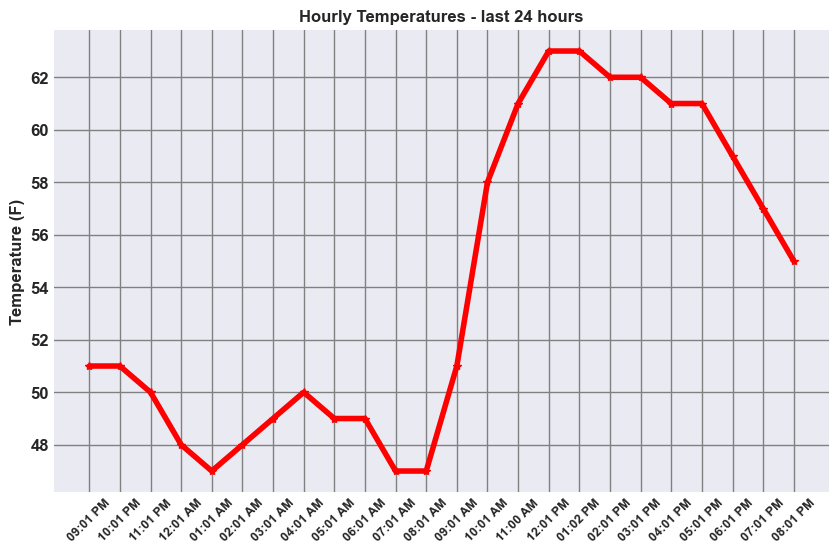

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns

df['temp'] = df['temp'].astype(int)
df['hourLocal'] = df['hourLocal'].astype(str)

t = df['temp']
y = t.to_numpy()
hour = df['hourLocal']
x = hour.to_numpy()

sns.set_style('darkgrid')
    
path1 = '/var/www/html/000/'
plt.figure(figsize= (10,6))
plt.xticks(fontsize = 9, rotation = 45, fontweight = 'bold')
plt.ylabel('Temperature (F)', fontsize=12, fontweight ='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.grid(axis = "y", linewidth = 1.0, color = 'gray')
plt.grid(axis = "x", linewidth = 1.0, color = 'gray')
plt.plot(x, t, marker = "*", color = "red", linewidth = 4, label = "Temperature")
plt.title('Hourly Temperatures - last 24 hours', fontsize = 12, fontweight = 'bold')
plt.savefig(f'{path1}testFire')       
#plt.show()